Inertia: 95.55394205616606


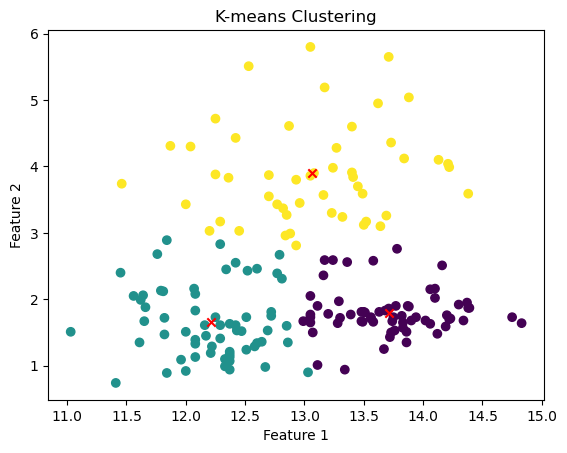

In [ ]:
# K-means Implementation 



from sklearn.datasets import load_wine
import numpy as np
import matplotlib.pyplot as plt

class KMeans:
    def __init__(self, n_clusters=3, max_iters=100):
        """
        Initialize KMeans clustering algorithm.

        Parameters:
        - n_clusters (int): Number of clusters.
        - max_iters (int): Maximum number of iterations.
        """
        self.n_clusters = n_clusters
        self.max_iters = max_iters
    

    def fit(self, X):
        """
        Fit KMeans to the data.
        Parameters:
        - X (array-like): Input data.
        """
        n_samples, n_features = X.shape
        
        # Initializing centroids randomly
        self.centroids = X[np.random.choice(n_samples, self.n_clusters, replace=False)]
        
        for i in range(self.max_iters):
            
            # Assigning labels based on closest centroid
            self.labels_ = np.argmin(np.linalg.norm(X[:, None] - self.centroids, axis=2), axis=1)
            
            # Updating centroids
            new_centroids = np.array([X[self.labels_ == k].mean(axis=0) for k in range(self.n_clusters)])
            
            # Check for convergence
            if np.allclose(self.centroids, new_centroids):
                break
            self.centroids = new_centroids

def inertia(X, labels, centroids):
    """
    Calculate the inertia of KMeans clustering.

    Parameters:
    - X (array-like): Input data.
    - labels (array-like): Cluster labels.
    - centroids (array-like): Cluster centroids.

    Returns:
    - float: Inertia value.
    """
    
    inertia = 0
    
    for i in range(len(centroids)):
        inertia += np.sum((X[labels == i] - centroids[i]) ** 2)
    return inertia

def visualize_clusters(X, labels, centroids):
    """
    Visualize KMeans clustering results.

    Parameters:
    - X (array-like): Input data.
    - labels (array-like): Cluster labels.
    - centroids (array-like): Cluster centroids.

    Returns:
    - None
    """
    
    plt.scatter(X[:, 0], X[:, 1], c=labels)
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', color='red')
    plt.title("K-means Clustering")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

def main():
    # Load the Wine dataset
    wine = load_wine()
    # Use only the first two features for visualization
    X = wine.data[:, :2]  

    # Perform KMeans clustering
    kmeans = KMeans(n_clusters=3)
    kmeans.fit(X)

    # Compute inertia
    print("Inertia:", inertia(X, kmeans.labels_, kmeans.centroids))

    # Visualize clusters
    visualize_clusters(X, kmeans.labels_, kmeans.centroids)

if __name__ == "__main__":
    main()


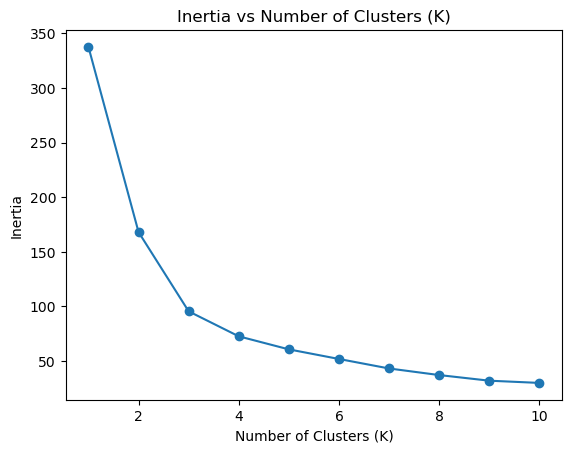

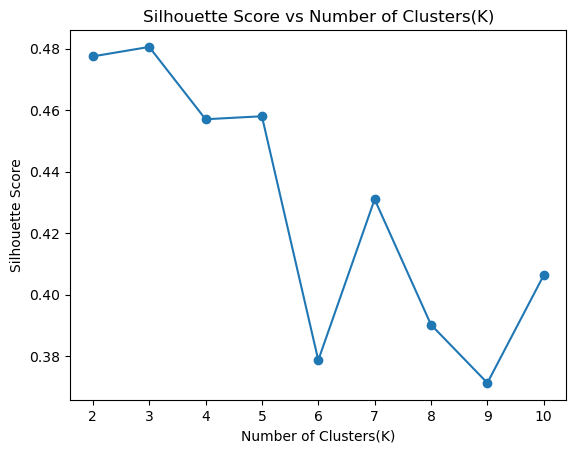

In [ ]:
# How to choose K in K-means


import numpy as np
from sklearn.datasets import load_wine
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

def plot_inertia_vs_k(X, max_k=10):
    """
    Plot the inertia versus the number of clusters.

    Parameters:
    - X (array-like): Input data.
    - max_k (int): Maximum number of clusters to consider. Default is 10.

    Returns:
    - None
    """
    inertias = []
    for num_clusters in range(1, max_k + 1):
        kmeans = KMeans(n_clusters=num_clusters, n_init=10)
        kmeans.fit(X)
        inertias.append(kmeans.inertia_)

    plt.plot(range(1, max_k + 1), inertias, marker='o')
    plt.title('Inertia vs Number of Clusters (K)')
    plt.xlabel('Number of Clusters (K)')
    plt.ylabel('Inertia')
    plt.show()

def plot_silhouette_vs_k(X, max_k=10):
    """
    Plot the silhouette score versus the number of clusters.

    Parameters:
    - X (array-like): Input data.
    - max_k (int): Maximum number of clusters to consider. Default is 10.

    Returns:
    - None
    """
    silhouette_scores = []
    for k in range(2, max_k + 1): 
        kmeans = KMeans(n_clusters=k,  n_init=10)
        kmeans.fit(X)
        silhouette_scores.append(silhouette_score(X, kmeans.labels_))

    plt.plot(range(2, max_k + 1), silhouette_scores, marker='o')
    plt.title('Silhouette Score vs Number of Clusters(K)')
    plt.xlabel('Number of Clusters(K)')
    plt.ylabel('Silhouette Score')
    plt.show()

def main():
    # Load the Wine dataset
    wine = load_wine()
    X = wine.data[:, :2]  # Use only the first two features for visualization

    # Plot Inertia vs Number of Clusters
    plot_inertia_vs_k(X)

    # Plot Silhouette Score vs Number of Clusters
    plot_silhouette_vs_k(X)

if __name__ == "__main__":
    main()


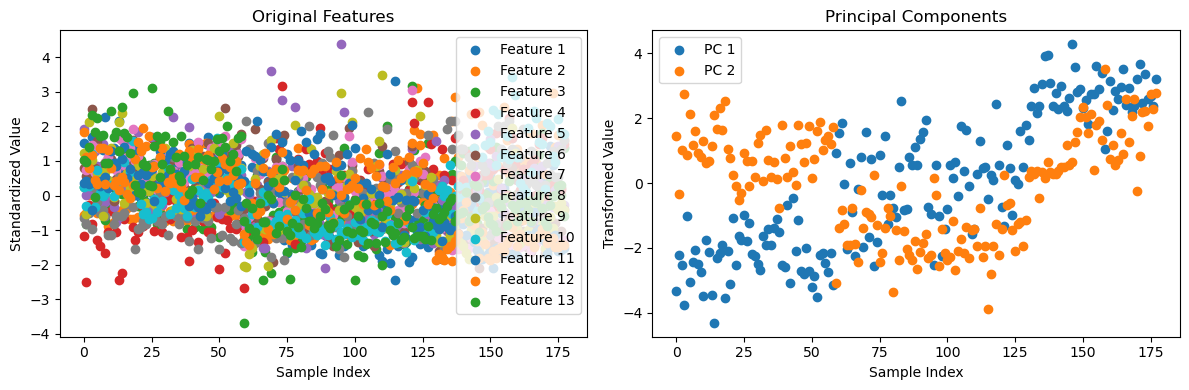

Original Shape: (178, 13)
Transformed Shape: (178, 2)


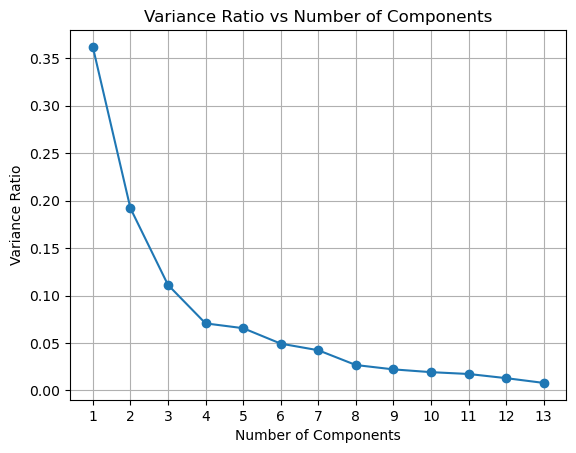

In [ ]:
# PCA Implementation

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
import warnings
warnings.filterwarnings('ignore')

class PCA:
    def __init__(self, n_components):
        """
        Initialize PCA object.

        Parameters:
        - n_components (int): Number of principal components to keep.

        Returns:
        - None
        """
        self.n_components = n_components

    def fit_transform(self, X): 
        """
        Fit PCA to the data and transform it into the principal components.

        Parameters:
        - X (array-like): Input data.

        Returns:
        - X_pca (array-like): Transformed data in the principal component space.
        """
        # Standardize the data
        X_std = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

        # Calculate covariance matrix
        cov_matrix = np.cov(X_std, rowvar=False)

        # Calculate eigenvalues and eigenvectors
        eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

        # Sort eigenvalues and eigenvectors
        sorted_indices = np.argsort(eigenvalues)[::-1]
        sorted_eigenvalues = eigenvalues[sorted_indices]
        sorted_eigenvectors = eigenvectors[:, sorted_indices]

        # Select top n_components eigenvectors
        top_eigenvectors = sorted_eigenvectors[:, :self.n_components]

        # Transform data into principal component space
        X_pca = np.dot(X_std, top_eigenvectors)
        
        # Visualize original features vs principal components
        pca.visualize_features_vs_components(X, X_std, X_pca)


        return X_pca

    def visualize_features_vs_components(self, X, X_std, X_pca):
        """
        Visualize original features vs principal components.

        Parameters:
        - X (array-like): Original input data.
        - X_std (array-like): Standardized input data.
        - X_pca (array-like): Transformed data in the principal component space.

        Returns:
        - None
        """
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

        # Plot original features
        for i in range(X.shape[1]):
            axes[0].scatter(np.arange(X.shape[0]), X_std[:, i], label=f'Feature {i+1}')

        # Plot principal components
        for i in range(X_pca.shape[1]):
            axes[1].scatter(np.arange(X.shape[0]), X_pca[:, i], label=f'PC {i+1}')

        axes[0].set_title('Original Features')
        axes[1].set_title('Principal Components')
        axes[0].set_xlabel('Sample Index')
        axes[1].set_xlabel('Sample Index')
        axes[0].set_ylabel('Standardized Value')
        axes[1].set_ylabel('Transformed Value')
        axes[0].legend()
        axes[1].legend()
        plt.tight_layout()
        plt.show()

    def plot_explained_variance_vs_components(self, X):
        """
        Plot explained variance ratio versus number of components.

        Parameters:
        - X (array-like): Input data.

        Returns:
        - None
        """
        # Standardize the data
        X_std = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

        # Calculate covariance matrix
        cov_matrix = np.cov(X_std, rowvar=False)

        # Calculate eigenvalues and eigenvectors
        eigenvalues, k = np.linalg.eig(cov_matrix)

        # Sort eigenvalues
        sorted_indices = np.argsort(eigenvalues)[::-1]
        sorted_eigenvalues = eigenvalues[sorted_indices]

        # Calculate explained variance ratio
        explained_variance_ratio = sorted_eigenvalues / np.sum(sorted_eigenvalues)

        # Plot explained variance ratio
        plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o')
        plt.title('Variance Ratio vs Number of Components')
        plt.xlabel('Number of Components')
        plt.ylabel('Variance Ratio')
        plt.xticks(range(1, len(explained_variance_ratio) + 1))
        plt.grid(True)
        plt.show()

# Example usage
if __name__ == "__main__":
    # Load Wine dataset
    wine = load_wine()
    X = wine.data

    # Perform PCA
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)

    # Print shapes of original and transformed data
    print("Original Shape:", X.shape)
    print("Transformed Shape:", X_pca.shape)

    # Plot explained variance ratio versus number of components
    pca.plot_explained_variance_vs_components(X)


Accuracy of Naive Bayes classifier: 0.8055555555555556


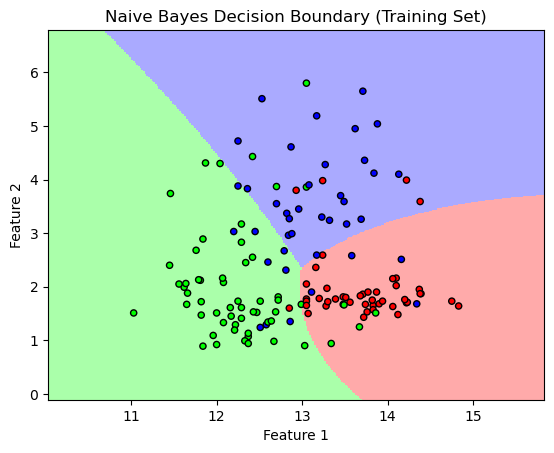

In [ ]:
#NaiveBayes Implementation

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap
import warnings
warnings.filterwarnings('ignore')

class NaiveBayes: 
    def fit(self, X, y):
        """
        Fit the Naive Bayes classifier to the training data.

        Parameters:
        - X (array-like): Training data, where each row represents a sample and each column represents a feature.
        - y (array-like): Target values.

        Returns:
        - None
        """
        self.classes = np.unique(y)
        self.class_priors = np.zeros(len(self.classes))
        self.class_means = np.zeros((len(self.classes), X.shape[1]))
        self.class_stds = np.zeros((len(self.classes), X.shape[1]))

        # Compute class priors
        for class_idx in range(len(self.classes)):
            class_label = self.classes[class_idx]
            self.class_priors[class_idx] = np.sum(y == class_label) / len(y)

        # Compute class means and standard deviations
        for class_idx in range(len(self.classes)):
            class_label = self.classes[class_idx]
            X_class = X[y == class_label]
            self.class_means[class_idx] = np.mean(X_class, axis=0)
            self.class_stds[class_idx] = np.std(X_class, axis=0)

    def predict(self, X):
        """
        Predict the class labels for the input data.

        Parameters:
        - X (array-like): Input data, where each row represents a sample and each column represents a feature.

        Returns:
        - array-like: Predicted class labels.
        """
        prediction = []
        for sample in X:
            probabilities = []
            for i in range(len(self.classes)):
                prior = self.class_priors[i]
                mean = self.class_means[i]
                stds = self.class_stds[i]
                likelihood = np.prod(self.pdf(sample, mean, stds))
                probabilities.append(prior * likelihood)
            prediction.append(self.classes[np.argmax(probabilities)])
        return np.array(prediction)

    def pdf(self, X, mean, std):
        """
        Compute the probability density function (PDF) for the given input data.

        Parameters:
        - X (array-like): Input data.
        - mean (array-like): Mean value.
        - std (array-like): Standard deviation.

        Returns:
        - array-like: Probability density function values.
        """
        exponent = -0.5 * (((X - mean) / std) ** 2)
        coefficient = 1 / (std * np.sqrt(2 * np.pi))
        return coefficient * np.exp(exponent)


def plot_decision_boundary(X, y, classifier, title):
    """
    Plot the decision boundary of a classifier along with the data points.

    Parameters:
    - X (array-like): Input data.
    - y (array-like): Target labels.
    - classifier: Trained classifier object with a predict method.
    - title (str): Title of the plot.

    Returns:
    - None
    """
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    # Determine plot limits
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    # Generate mesh grid
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))

    # Predict class labels for each point in the mesh grid
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot decision boundary
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot data points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)

    # Set plot limits
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

    # Set plot title and labels
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')

    # Show plot
    plt.show()


def main():
    # Load the Wine dataset
    wine = load_wine()
    X = wine.data[:, :2]  # Use only the first two features for visualization
    y = wine.target

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Create and fit the Naive Bayes classifier
    nb_classifier = NaiveBayes()
    nb_classifier.fit(X_train, y_train)

    # Predict
    y_pred = nb_classifier.predict(X_test)

    # Compute accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy of Naive Bayes classifier:", accuracy)

    # Plot decision boundary
    plot_decision_boundary(X_train, y_train, nb_classifier, 'Naive Bayes Decision Boundary (Training Set)')

if __name__ == "__main__":
    main()